In [114]:
import pandas as pd
import numpy as np

In [115]:
hotel = pd.read_csv("hotel_bookings.csv")

In [116]:
hotel.shape

(119390, 32)

In [117]:
hotel = hotel.loc[0:3000]

In [118]:
hotel.shape

(3001, 32)

## melihat type masing masing column dan persenan null value nya tiap column,dan berdasarkan beberapa paper yang saya baca jika data nan pada suatu kolom kurang dari 20%,bisa di drop saja nannya,dan jika ada column yang lebh dari 85 persen kosong,bisa di drop saja kolumnnya

In [119]:
pd.set_option('display.max_columns', 500)
tab_info=pd.DataFrame(hotel.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()/hotel.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
column type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,float64,int64,object,object,object,object,int64,int64,int64,object,object,int64,object,float64,float64,int64,object,float64,int64,int64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,465,2878,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0.0333222,0,0,0,0,0,0,0,0,0,15.4948,95.9014,0,0,0,0,0,0,0


# kolom country dan agen dibawah 20 persen,dan company diatas 85 persen

In [120]:
hotel.dropna(subset=['country'],inplace=True)

In [121]:
hotel.dropna(subset=['agent'],inplace=True)

In [122]:
del hotel['company']

In [123]:
pd.set_option('display.max_columns', 500)
tab_info=pd.DataFrame(hotel.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()/hotel.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
column type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,float64,int64,object,object,object,object,int64,int64,int64,object,object,int64,object,float64,int64,object,float64,int64,int64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
hotel.shape

(2536, 31)

# data sudah bersih dari null values dan type data dalam setiap column sudah sesuai typenya,dan data sekarang berjumah 2536 row,serta 31 column

# membuang kolom yanng kurang penting

In [125]:
hotel['hotel'].unique()

array(['Resort Hotel'], dtype=object)

In [126]:
hotel['arrival_date_year'].unique()

array([2015], dtype=int64)

karena column hotel dan arrival date year hanya memiliki 1 unique value,maka akan saya drop

In [127]:
del hotel['hotel']
del hotel['arrival_date_year']

saya juga ingin membuang kolom reservation_status dan	reservation_status_date,karean saya rasa data ini sudah direpresntasikan oleh kolum target di kolom 1

In [128]:
del hotel['reservation_status']
del hotel['reservation_status_date']

In [129]:
hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0


# Barplot bivariate

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

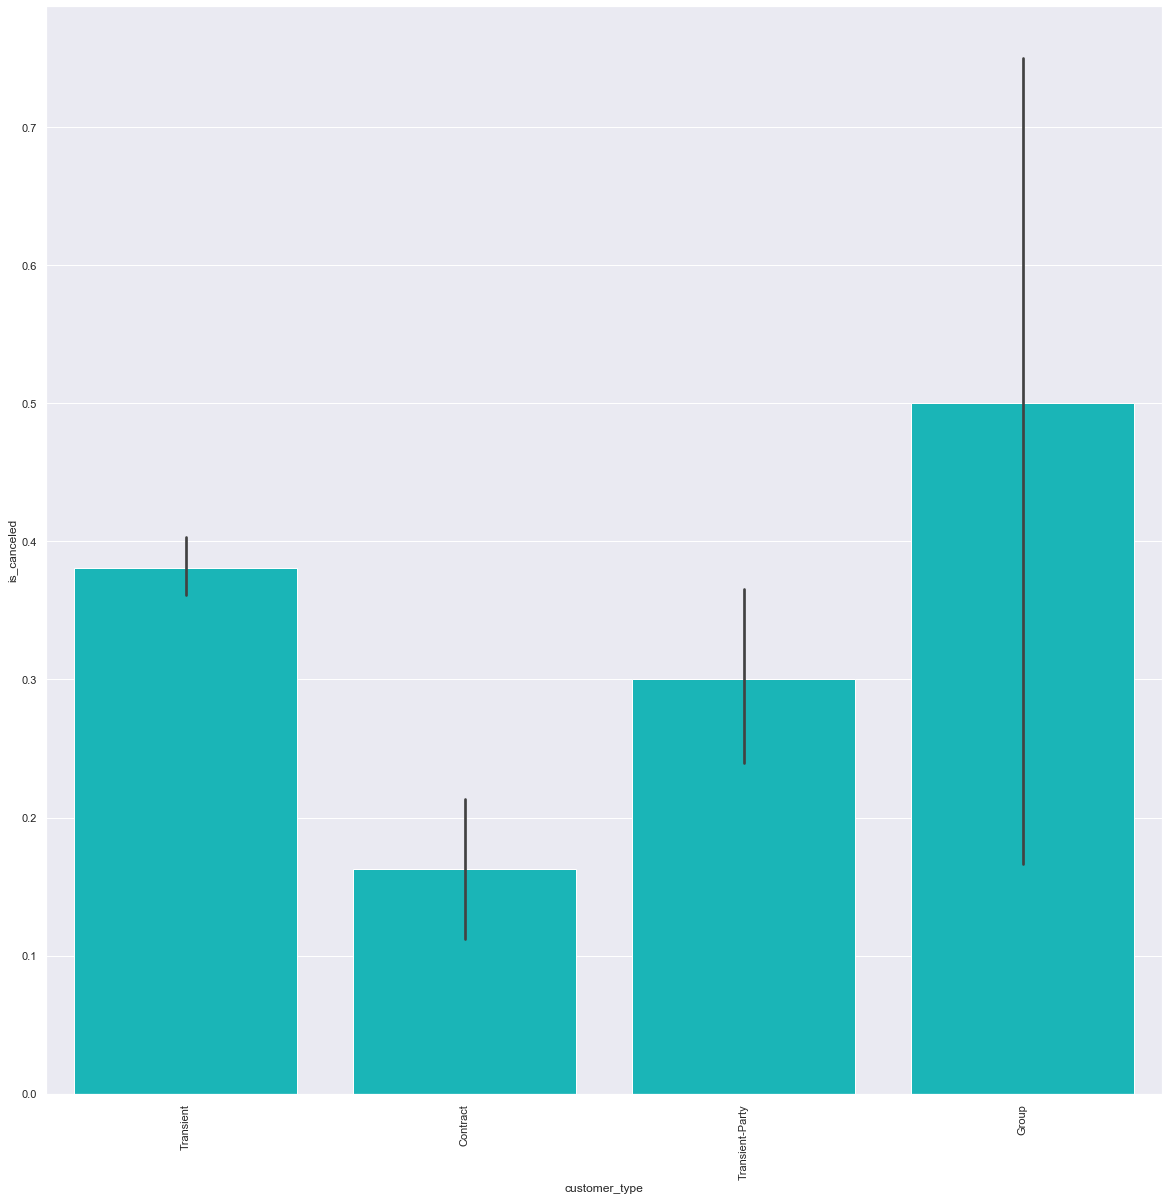

In [131]:
sns.barplot('customer_type', 'is_canceled', data=hotel, color="darkturquoise")
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()


## dapat dilihat berdasarkan customer type,jenis type contract memiliki probability untuk cancel yang sangat rendah dibanding yang lainnya,karena biasanya jika berdasarkan kontrak ada beberapa perjanjian dan klausul ntah itu berupa uang atau apapun yang harus disepakati kedua belah pihak ketika terjadi cancellation,maka dari itu kebnyakn customer ini wajar jika sanat sedikit yang membatalkan pesanannya

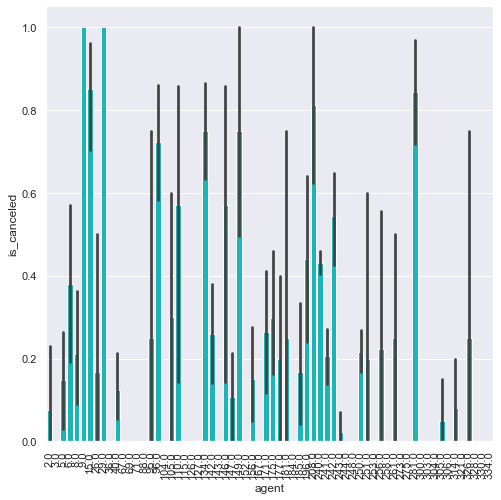

In [132]:
sns.barplot('agent', 'is_canceled', data=hotel, color="darkturquoise")
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()


# Dari data agent diatas dapat kita lihat,ada beberapa agent yang prob cancelnya rendah dan ada yang tinggi,data ini penting bagi perusahaan sebagai bahan pertimbangan kedepannya,mana agent yang perlu diprioritaskan dan mana yang kredibilitasnya kurang baik sehingga di nomor duakan,atau bisa juga kita memberikan reward ke agent yang prob cancel track recordnya sangat baik

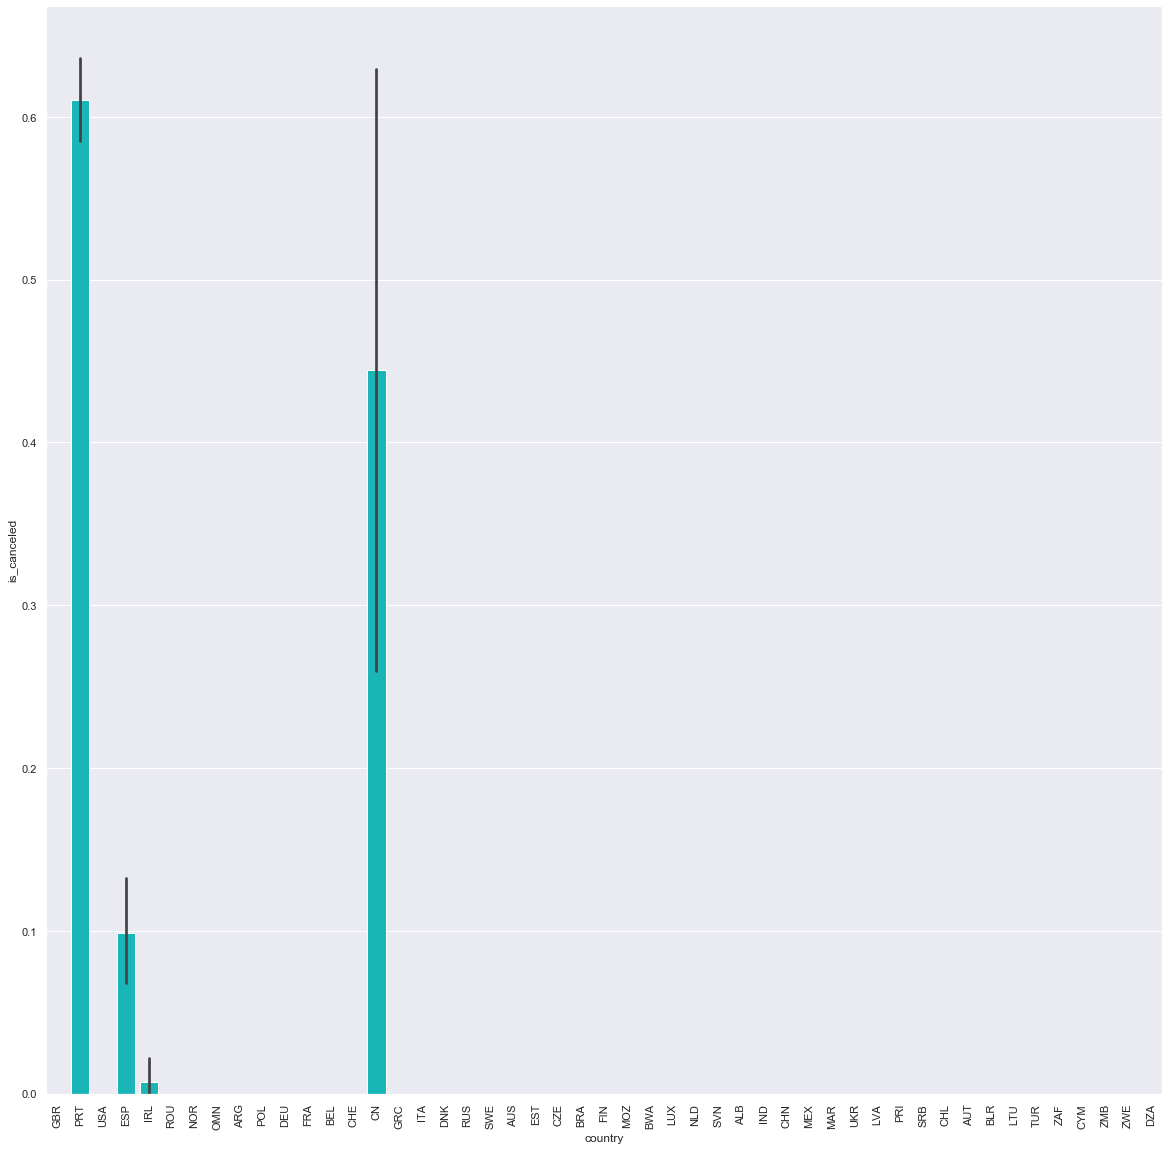

In [133]:
sns.barplot('country', 'is_canceled', data=hotel, color="darkturquoise")
sns.set(rc={'figure.figsize':(8,8)})
plt.xticks(rotation=90)
plt.show()


# dari data diatas kita bisa melihat negara mana saja yang prob cancelnya tinggi


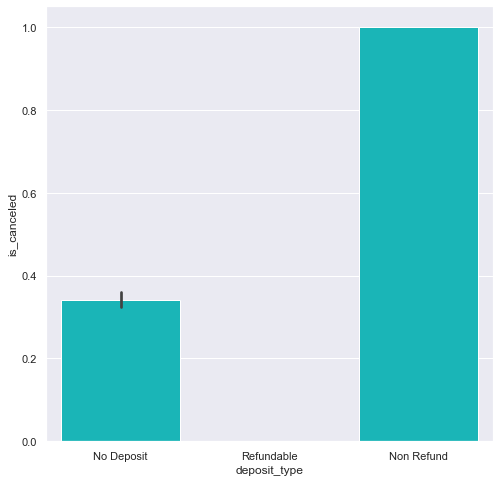

In [134]:
sns.barplot('deposit_type', 'is_canceled', data=hotel, color="darkturquoise")
sns.set(rc={'figure.figsize':(7,7)})
plt.show()


# dari data diatas bisa kita lihat malah non refund lah yang tinggi probnya untuk cancel,dalam deskripsi non refund yaitu 

# Non Refund – a deposit was made in the value of the total stay cost;If the payment was equal or exceededthe total cost of stay, the value is set as“Non Refund”.

## jadi dalam kasus ini dapat kita ambil gambaran bahwa tidak selalu customer yang sudah melakukan deposit diawal pasti probabilitas untuk tidak cancelnya lebih rendah,berdasarkan data diatas malah lebih tinggi probnya

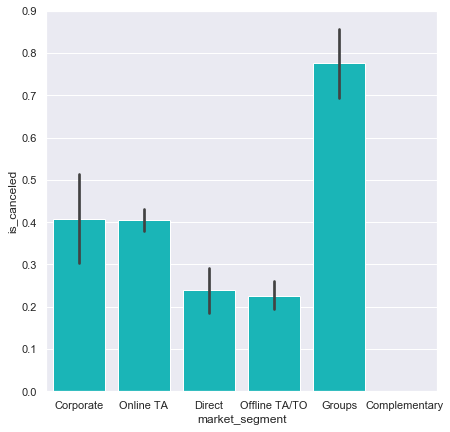

In [135]:
sns.barplot('market_segment', 'is_canceled', data=hotel, color="darkturquoise")

plt.show()


# market segment juga dapat menjadi pertimbangan perusahaan dimana market segment groups memebrikan prob cancel yang lebih tinggi dibanding segmen lain,maka dari itu pesanan dari segmen ini harus di diberi perhatian dan treatment khusus

## liat outlier

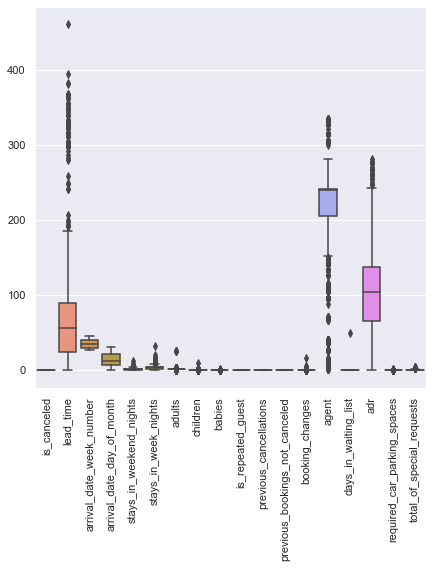

In [136]:
sns.boxplot(data=hotel)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,20)})

# ada beberapa data yang outlier,namun data tersebut masih masuk akal misalkan bisa dilihat agent,terdapat outlier,masuk akal karena nomor id agnet bisa beragam dan berbeda beda,lead time juga masuk akal,karena itu waktu pesanan pertama kali masuk dan waktu ketika tiba di hotel. 

# selanjutnya untuk outlier ADR,ADR adalah dengan dividing the sum of all lodging transactions by the total number of staying nights,jadi jika nilai ADR semakin tinggi maka semakin bagus,outlier disini outlier yang bagus saya rasa



# namun dalam pembuatan model nanti saya akan mempertahankan outlier,karena alasan pertama tadi outliernya masih masuk akal,jika accuracy model saya sudah memuaskan misal diatas 90 saya akan tetap menggunakan outlier,dan alasan kedua agar model saya terbiasa dengan adanya outlier dikemudian hari

# selanutnya saya akan melakukan encode untuk data data kategorikal,untuk nominal saya menggunakan laber encoder

In [137]:
hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0


In [138]:
from sklearn.preprocessing import LabelEncoder
hotel['meal_encoded'] = LabelEncoder().fit_transform(hotel['meal'])
hotel['country_encoded'] = LabelEncoder().fit_transform(hotel['country'])
hotel['market_segment_encoded'] = LabelEncoder().fit_transform(hotel['market_segment'])
hotel['distribution_channel_encoded'] = LabelEncoder().fit_transform(hotel['distribution_channel'])
hotel['deposit_type_encoded'] = LabelEncoder().fit_transform(hotel['deposit_type'])
hotel['customer_type_encoded'] = LabelEncoder().fit_transform(hotel['customer_type'])
hotel['reserved_room_type_encoded'] = LabelEncoder().fit_transform(hotel['reserved_room_type'])
hotel['assigned_room_type_encoded'] = LabelEncoder().fit_transform(hotel['assigned_room_type'])

In [139]:
hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,0,21,1,0,0,2,0,0
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,1,37,2,1,0,2,1,2
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,0,37,5,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0,0,37,2,1,0,2,0,0
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0,0,37,1,0,0,3,0,0
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0,0,17,2,1,0,2,0,3
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0,0,37,4,2,0,2,2,3


In [140]:
#mencari unique value dari arrival date month

In [141]:
hotel['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November'], dtype=object)

# lalu untuk arrival_date_month,saya menggunakan ordinal encoding

In [142]:
Temp_dict = {'July': 1, 'August': 2, 'September': 3, 'October': 4, 'November': 5}
hotel['arrival_date_month_encode'] = hotel['arrival_date_month'].map(Temp_dict)
hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0,0,37,4,2,0,2,2,3,5


## lalu saya menghapus kolom yang belum di encoded

In [143]:
del hotel['arrival_date_month']


In [144]:
del hotel['meal']
del hotel['country']
del hotel['market_segment']
del hotel['distribution_channel']
del hotel['deposit_type']
del hotel['customer_type']
del hotel['reserved_room_type']
del hotel['assigned_room_type']

In [145]:
hotel

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


# selanjutnya saya ingin melihat features2 mana saja yang memiliki pengaruh yang signifikan ke dalam target saya

In [146]:
## Features Importance

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [148]:
hotel

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


# membagi data ke x yaitu variabel bebas adalah variabel yang mempengaruhi atau yang menjadi penyebab terjadinya perubahan atau timbulnya variabel terkait

# sementara variabel y adalah variabel target atau Variabel terikat (dependen variable),yaitu variabel yang memberikan reaksi atau respon jika dihubungkan dengan variabel bebas, biasa dinotasikan dengan Y

In [149]:
X = hotel.iloc[:,1:30]  #independent columns/feature non target
Y = hotel.iloc[:,0:1]    #target column i.e price range

In [150]:
X

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


In [151]:
Y

,is_canceled
3,0
4,0
5,0
7,0
8,1
...,...
2995,1
2996,1
2997,0
2999,0


# ada 3 cara yang saya coba gunakan,dalam mencari fitur fitur penting

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[7.51193327e-02 4.46606280e-02 4.69940613e-02 3.62376092e-02
 4.49084863e-02 1.74039640e-02 1.17255775e-02 5.44613820e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.28505376e-02
 3.88618626e-02 1.81570758e-04 6.10192214e-02 7.51092326e-02
 3.10074028e-02 2.08256573e-02 2.72666255e-01 2.89044453e-02
 1.13127907e-02 3.54112260e-02 2.10780337e-02 2.90135107e-02
 4.00704769e-02 2.91919798e-02]


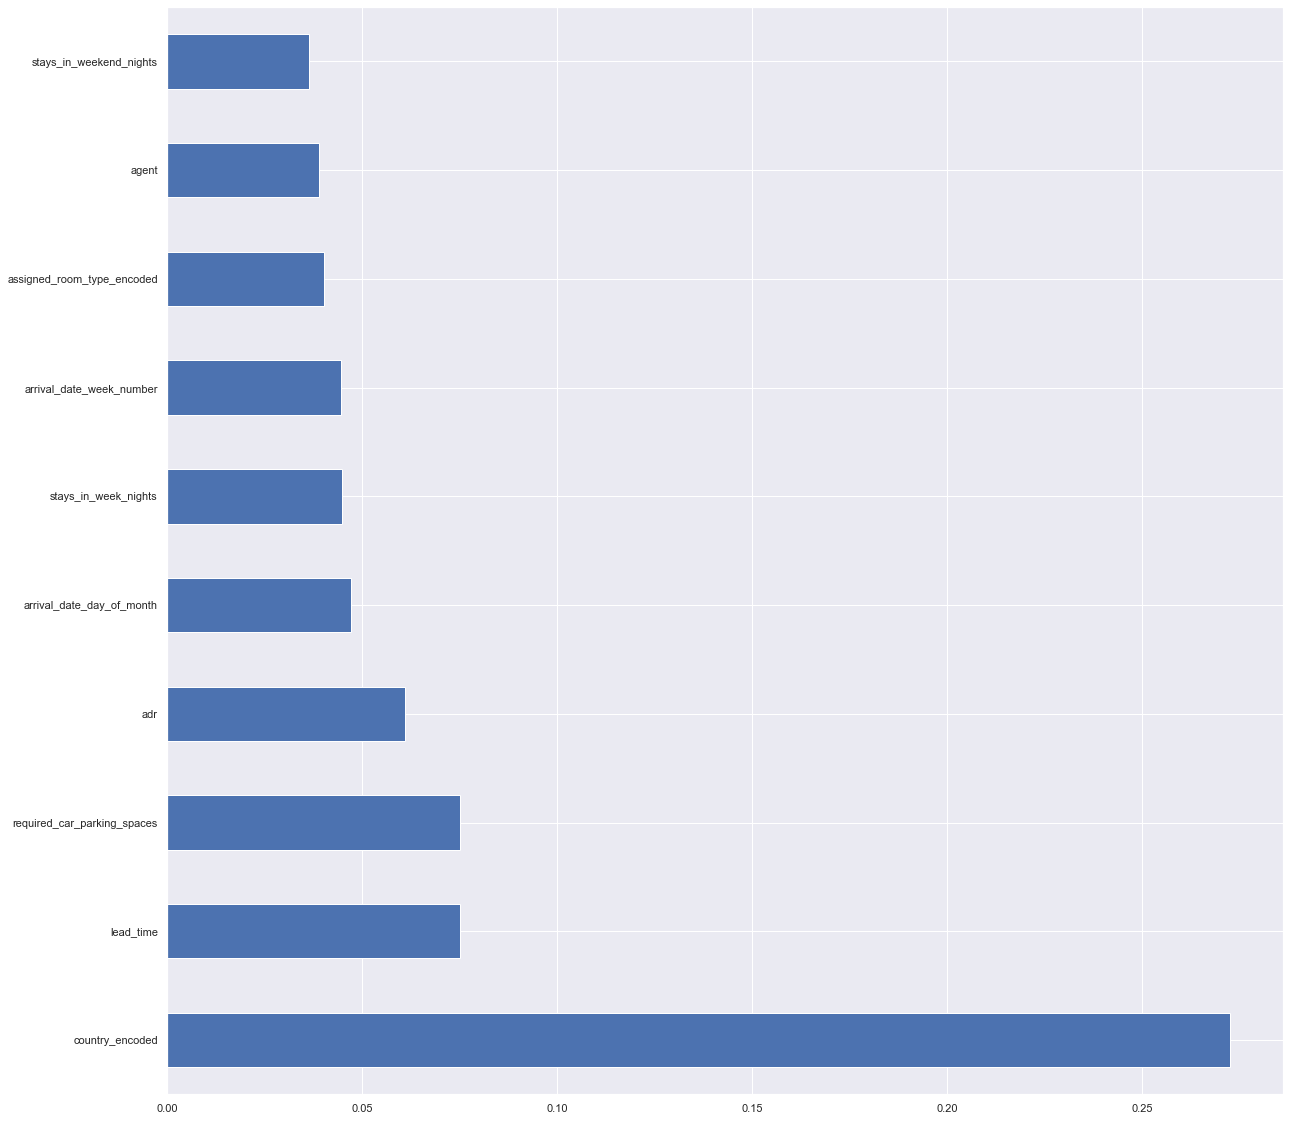

In [152]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [153]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Specs        Score
0                     lead_time  3990.147014
18              country_encoded  1787.356931
14                          adr  1357.613616
15  required_car_parking_spaces   182.311656
24   assigned_room_type_encoded   125.490295
21         deposit_type_encoded   107.809190
11              booking_changes    67.470708
12                        agent    46.012388
13         days_in_waiting_list    27.791411
2     arrival_date_day_of_month    15.958152


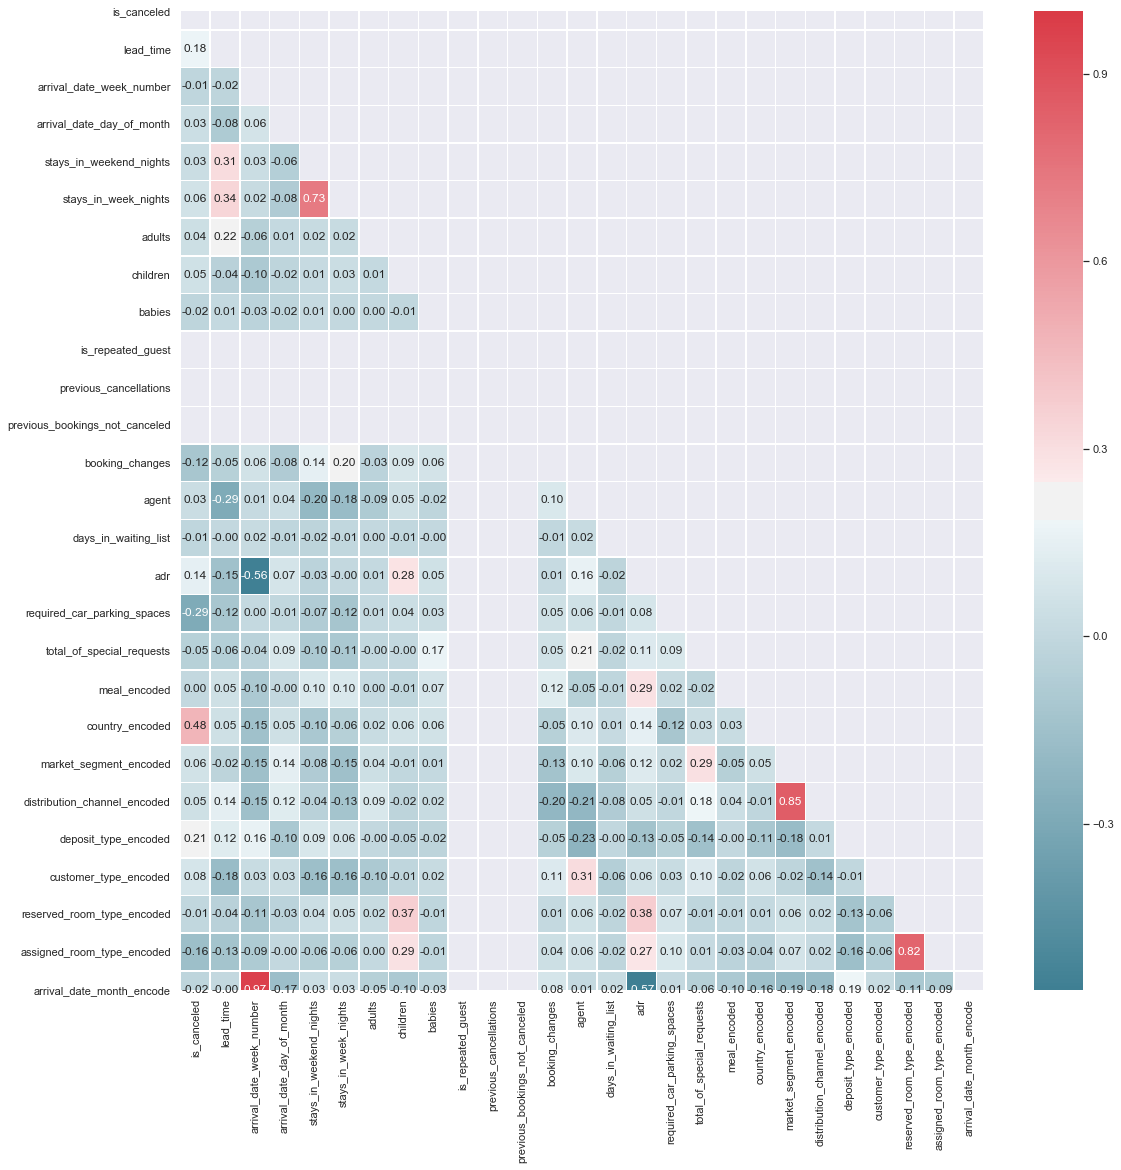

In [154]:
corr = hotel.corr()
fig, ax = plt.subplots(figsize=(18, 18))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# saya akan mencoba dua percobaan,dengan semua kolom dan menggunakan 10 kolom teratas dari feature selection,saya akan menggunakan 10 teratas dari Kbest dan Extratree classifier,karena dari beberapa paper 2 tools ini yang paling sering dijadikan patokan,dan hasilnya keduanya bisa kita lihat sebagian besar sama 10 teratasnya

# percobaan pertama,saya menggunakan random forest,saya lebih mendahulukan menggunakan random forest karena berdasarkan beberapa kesempatan saya dalam latihan membuat model dan dari beebrapa paper, random forest memiliki tingkat accuracy model yang cukup tinggi dibandingkan dengan logistic regression ataupun decission tree,karena random foreest itu adalah kumpulan banyak pohon bisa dibilang hutan taua kumpulan dari decision tree,random forest terus melakukan iterasi dari setiap pohon terbaik sehingga tidak heran hasilnya lebih baik, dengan menggunakan semua fitur

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Spliting Dataset**

In [156]:
hotel

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


In [157]:
x = hotel.drop(['is_canceled'], axis = 1)
y = hotel['is_canceled']

In [158]:
y

3       0
4       0
5       0
7       0
8       1
       ..
2995    1
2996    1
2997    0
2999    0
3000    1
Name: is_canceled, Length: 2536, dtype: int64

# saya membagi data set kedalam 2 bagian,yaitu training dan test,proporsinya 90 persen dan 10 persen,agar model lebih banyak belajar

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [160]:
model = RandomForestClassifier(n_estimators = 2000, min_samples_split= 2, min_samples_leaf = 1, max_depth = 25)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=2000)

In [161]:
# prediksi
y_pred = model.predict(x_test) 

In [162]:
# trying to predict using model
coba = x_test.iloc[:1]
model.predict(coba)
# coba

array([1], dtype=int64)

### **Evaluating Model**

In [163]:
confusion_matrix(y_test, y_pred) 

array([[141,  12],
       [ 12,  89]], dtype=int64)

In [164]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       153
           1       0.88      0.88      0.88       101

    accuracy                           0.91       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.91      0.91      0.91       254



In [165]:
model.score(x_train, y_train)

0.9986853637160386

In [166]:
model.score(x_test, y_test)

0.905511811023622

In [167]:
accuracies = {}
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 90.55%


# 90 persen saya rasa sudah bagus,namun untuk lebih membaguskan  model lagi mari kita coba menggunakan hyperparameter

In [168]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [169]:
param_dist = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [170]:
# tree = RandomForestClassifier()
# tree_cv = RandomizedSearchCV(tree,param_dist,cv=30)

In [171]:
# tree_cv.fit(x_train,y_train)

In [172]:
# print('Tuned Decision Tree Parameters:{}'.format(tree_cv.best_params_))
# print('Best score is {}'.format(tree_cv.best_score_))

# coba lagi dengan parameter baru

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [174]:
model = RandomForestClassifier(n_estimators = 1400, min_samples_split= 10, min_samples_leaf = 1, max_depth = None)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1400)

In [175]:
# prediksi
y_pred = model.predict(x_test) 

### **Evaluating Model**

In [176]:
confusion_matrix(y_test, y_pred) 

array([[141,  12],
       [  9,  92]], dtype=int64)

In [177]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       153
           1       0.88      0.91      0.90       101

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.91       254
weighted avg       0.92      0.92      0.92       254



In [178]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9684487291849255
0.9173228346456693


In [179]:
accuracies = {}
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 91.73%


# model random forest kita sangat baik hasilnya,dan data kita tidak over fitting bisa dilihat dari hasil training dan testnya tidak menunjukan hasil perbedaan yang terlalu signifikan,kalo data kita overfitting bisa menyebaknan hasilnya drop di testnya,namun ini tidak,jadi cukup bagus,sleanjutnya kita buat model lain.

## percobaab 2: menggunakan random forest dan menggunakan 10 fitur teratas saja

 lead_time  
             country_encoded  
                         adr  
  required_car_parking_spaces   
  assigned_room_type_encoded   
         deposit_type_encoded   
              booking_changes    
                      agent   
         days_in_waiting_list   
arrival_date_day_of_month    

In [180]:
x = hotel[['lead_time','country_encoded','adr','required_car_parking_spaces','assigned_room_type_encoded','deposit_type_encoded'
          ,'booking_changes','agent','days_in_waiting_list','arrival_date_day_of_month']]
y = hotel['is_canceled']

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [182]:
model = RandomForestClassifier(n_estimators = 1400, min_samples_split= 10, min_samples_leaf = 1, max_depth = None)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1400)

In [183]:
# prediksi
y_pred = model.predict(x_test) 

In [184]:
# trying to predict using model
coba = x_test.iloc[:1]
model.predict(coba)
# coba

array([1], dtype=int64)

### **Evaluating Model**

In [185]:
confusion_matrix(y_test, y_pred) 

array([[134,  19],
       [  8,  93]], dtype=int64)

In [186]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       153
           1       0.83      0.92      0.87       101

    accuracy                           0.89       254
   macro avg       0.89      0.90      0.89       254
weighted avg       0.90      0.89      0.89       254



In [187]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9592462751971954
0.8937007874015748


In [188]:
accuracies = {}
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 89.37%


# menggunakan decission tree dan semua fitur

In [189]:
x = hotel.drop(['is_canceled'], axis = 1)
y = hotel['is_canceled']

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

In [191]:
param_dist = {'max_depth' : [3,32,None],
             'min_samples_leaf': randint(1,9),
             'criterion':['gini','entropy']}

In [192]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=10)
#set cv ada berapa
tree_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 32, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002359D4BD708>})

In [193]:
print('Tuned Decision Tree Parameters:{}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}
Best score is 0.8230483413774612


In [194]:
tree = DecisionTreeClassifier(criterion = "gini",max_depth=3, min_samples_leaf=6)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [195]:
y_pred = tree.predict(x_test)

In [196]:
confusion_matrix(y_test, y_pred)

array([[153,  24],
       [  5,  72]], dtype=int64)

In [197]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       177
           1       0.75      0.94      0.83        77

    accuracy                           0.89       254
   macro avg       0.86      0.90      0.87       254
weighted avg       0.90      0.89      0.89       254



In [198]:
tree.score(x_train, y_train)

0.8453111305872042

In [199]:
tree.score(x_test, y_test)

0.8858267716535433

# menggunakan decision tree 10 fitur teratas

In [200]:
x = hotel[['lead_time','country_encoded','adr','required_car_parking_spaces','assigned_room_type_encoded','deposit_type_encoded'
          ,'booking_changes','agent','days_in_waiting_list','arrival_date_day_of_month']]
y = hotel['is_canceled']

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

In [202]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=10)
#set cv ada berapa
tree_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 32, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002359D4BD708>})

In [203]:
print('Tuned Decision Tree Parameters:{}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}
Best score is 0.8400789090630507


In [204]:
tree = DecisionTreeClassifier(criterion = "gini",max_depth=3, min_samples_leaf=4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [205]:
y_pred = tree.predict(x_test)

In [206]:
confusion_matrix(y_test, y_pred)

array([[153,  24],
       [  5,  72]], dtype=int64)

In [207]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       177
           1       0.75      0.94      0.83        77

    accuracy                           0.89       254
   macro avg       0.86      0.90      0.87       254
weighted avg       0.90      0.89      0.89       254



In [208]:
tree.score(x_train, y_train)

0.8453111305872042

In [209]:
tree.score(x_test, y_test)

0.8858267716535433

In [210]:
# menggunakan logistic

# Ada 2 jenis kesalahan yang mungkin terjadi dalam model ML di studi kasus ini, yaitu:

# 1.Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan.

# 2.Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan).

# jenis kesalahan yang paling berpengaruh terhadap perusahaan saya rasa adalah yang poin 2,karena dengan memprediksi user tidak membatalkan pesanan,padahal sebenarnya user membatalkan pesanan,maka kamar yang tadi harusnya kita sudah tau bakal dicancel pesanannya,dapat kita alihkan atau jual ke customer lain ,tapi malah kita tetap jaga buat cutomer yang seharusnya udah bakal cancel bookingnya,akibatnya mendekati hari H kamar yang customer yang tadi kita salah prediksi ga cancel ,ketika di cancel kamarnya maka kita akan bingung menawarkan kamarnya ke customer lain karena mepet waktunya dan bsia menyebabkan kamar itu kosong pada hari H sehingga revenue perusahaan pada kamar itu di hari tersebut berkurang

# maka dari itu untuk menekan kesalahan ini makanya kita harus mencari model yang memiliki recall 0 yang paling besar,artinya model bisa menebak orang mana tidak mau cancel dibanding yang aktualnya cancel,kita harus mencari model yang memiliki recall 0(tidak cancel) yang tinggi

In [213]:
import pandas as pd
import numpy as np
data = {"Condition": ['Random forest semua fitur', 'Random forest 10 fitur teratas', 'Decision tree semua fitur','Decison tree 10 fitur teratas'],
       'Recall 0(tidak cancel)': [92,88,86,86],}
df = pd.DataFrame(data)
df

,Condition,Recall 0(tidak cancel)
0,Random forest semua fitur,92
1,Random forest 10 fitur teratas,88
2,Decision tree semua fitur,86
3,Decison tree 10 fitur teratas,86


<Figure size 360x360 with 0 Axes>

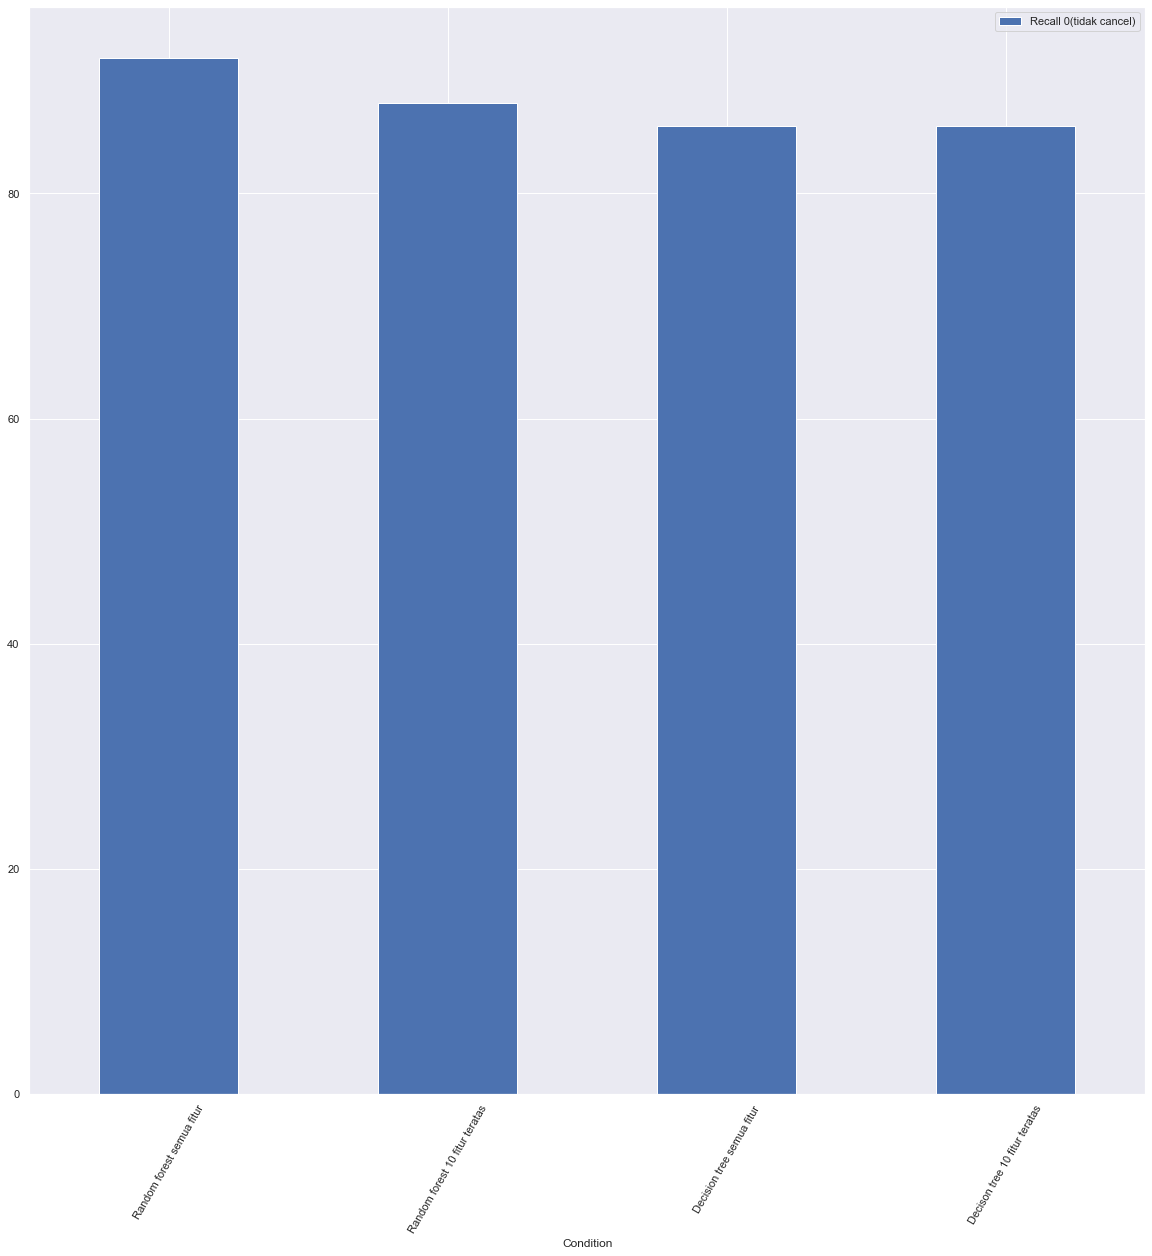

In [214]:
plt.figure(figsize=(5,5))
df.plot(x="Condition", y=["Recall 0(tidak cancel)"], kind="bar")
plt.xticks(rotation=60)
plt.show()

# dari data diatas dapat disimpulkan bahwa model dengan recall 0 terbaik dan paling tinggi adalah model dengan menggunakan  model yang menggunakan random forest ,dan menggunakan semua fitur dan sudah menggunakan hyperparamater tuning yaitu sebesar:

# recall 0 : 92 persen

# jadi model  ketepatan model kita untuk prediksi orang yang tidak cancel dibanding yang aktualnya tidak cancel adalah sebesar 92 persen.

# ada beberapa cara saya untuk memaksimalkan model kedepannya,yaitu memperbanyak data,lalu bisa juga menggunakan tools lain selain random forest dan juga decison tree,sehingga hasilnya bisa kita bandingkan dan kita dapat memilih model terbaik

# sekian project saya tentang dataset hotel booking cancelation,semoga model ini dapat membantu perusahaan untuk memaksimalkan pelayanannya kedepannya,terima kasih:)